<a href="https://colab.research.google.com/github/AlfaIV/Microwave-and-Antennas-LabWork/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%92%D0%A7_%D0%B8_%D0%90%D0%BD%D1%82%D0%B5%D0%BD%D0%BD%D1%8B_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn
import scipy.constants as const
import math
from math import cos,sin
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar,minimize,curve_fit
import scipy.special as sp

Рассчитаем диаграмму направленности(ДН) в двух главных плоскостях излучающего раскрыва рупора.

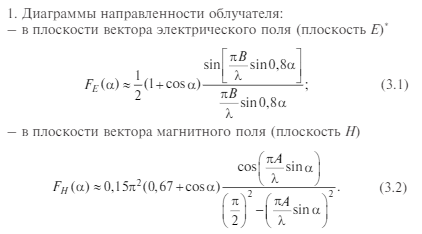

In [ ]:
f_0 = 13.5*const.giga
lambda_0 = const.c/f_0
A = 36*const.milli
B = 28*const.milli
F_E = lambda alpha: 1/2*(1 + cos(alpha))*sin((const.pi*B)/(lambda_0) * sin(0.8*alpha))/(const.pi*B/lambda_0*sin(0.8*alpha))
F_H = lambda alpha: 0.15*const.pi**2*(0.67 + cos(alpha))*cos(const.pi*A/lambda_0*sin(alpha))/((const.pi/2)**2 - (const.pi*A/lambda_0*sin(alpha))**2)
alpha = np.linspace(-40,40,1000)

In [ ]:
lambda_0,lambda_0/const.milli

(0.02220684874074074, 22.20684874074074)

$f_0 = 13.5 ГГЦ$

$\lambda_0 = \frac{c}{f} = 0.022 м = 22 мм$

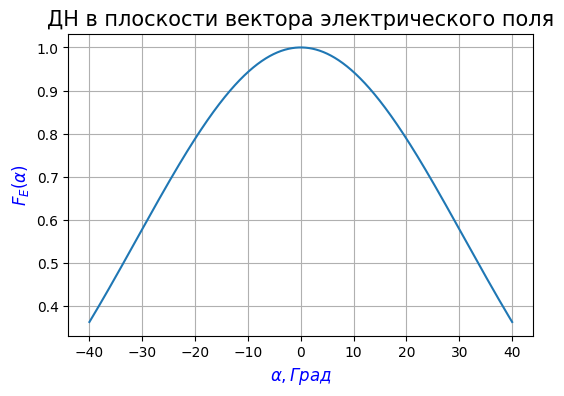

In [ ]:
#alpha = np.linspace(-const.pi,const.pi,1000)
alpha = np.linspace(math.radians(-40),math.radians(+40),1000)
conv_alpha = list(map(math.degrees,alpha))

plt.figure(dpi=100,figsize=(6,4))
plt.plot((conv_alpha), list(map(F_E,alpha)), label='$F_E(\alpha)$')
plt.title("ДН в плоскости вектора электрического поля", fontsize=15)
plt.xlabel('$α, Град$', fontsize=12, color='blue')
plt.ylabel('$F_E(α)$', fontsize=12, color='blue')
#plt.legend()
plt.grid(True)
#plt.text(15, 4, 'grow up!')


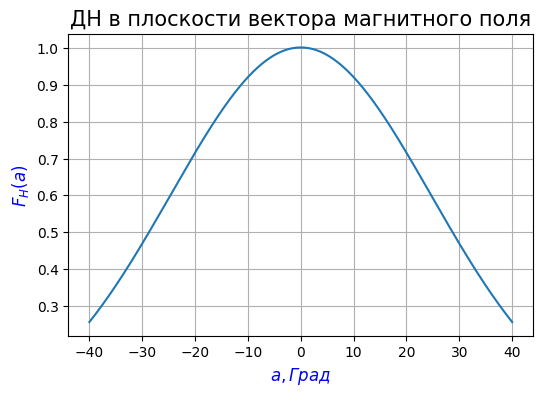

In [ ]:
plt.figure(dpi=100,figsize=(6,4))
plt.plot(conv_alpha, list(map(F_H,alpha)), label='$F_E(\alpha)$')
plt.title("ДН в плоскости вектора магнитного поля", fontsize=15)
plt.xlabel('$a, Град$', fontsize=12, color='blue')
plt.ylabel('$F_H(a)$', fontsize=12, color='blue')
#plt.legend()
plt.grid(True)
#plt.text(15, 4, 'grow up!')

Теперь построим график распределения амлитуд поля в излучающем раскрыве зеркала вдоль вертикального и горизонтального диаметров, используя следующие зависимости:

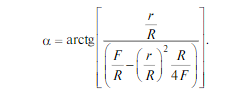

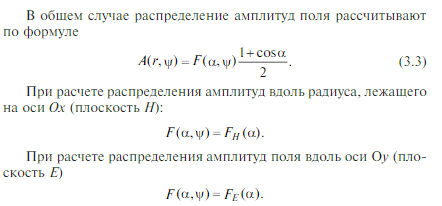

In [ ]:
R = 185*const.milli
F = 195*const.milli
alpha = lambda r: math.atan((r/R)/(F/R - (r/R)**2*R/(4*F)))
A_E = lambda r: (1 + cos(alpha(r)))/4*F_E(alpha(r))
A_H = lambda r: (1 + cos(alpha(r)))/4*F_H(alpha(r))
#A = lambda r: A_E(r) + A_H(r) 
r = np.linspace(-R,R,1000)

In [ ]:
data_A_E = list(map(A_E,r))
data_A_H = list(map(A_H,r))

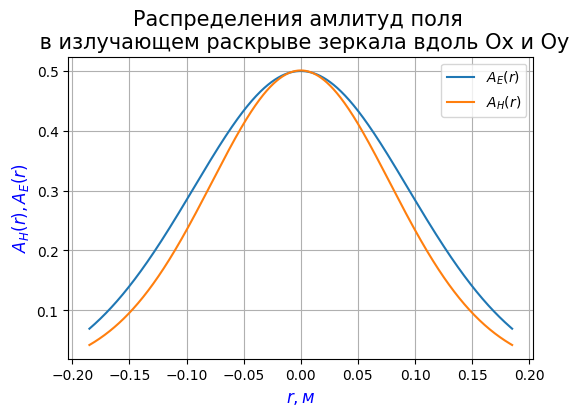

In [ ]:
plt.figure(dpi=100,figsize=(6,4))
plt.plot(r, data_A_E, label='$A_E(r)$')
plt.plot(r, data_A_H, label='$A_H(r)$')
plt.title("Распределения амлитуд поля \n в излучающем раскрыве зеркала вдоль Ox и Оу", fontsize=15)
plt.xlabel('$r,м$', fontsize=12, color='blue')
plt.legend()
plt.ylabel('$A_H(r),A_E(r)$', fontsize=12, color='blue')
plt.grid(True)

Подберем аналитическое выражение, аппроксимирующее   функцию распределения амплитуд вдоль радиуса зеркала.

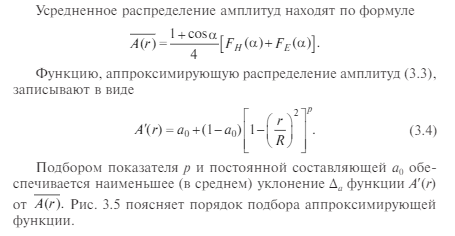

In [ ]:
data_A_E = np.array(data_A_E)
data_A_H = np.array(data_A_H)
data_A = data_A_E + data_A_H
#len(data_A),len(r)

In [ ]:
a_0 = A_E(R) + A_H(R)
A_prime = lambda r,p: a_0 + (1 - a_0)*(1 - (r/R)**2)**p
#opt_A_prime = lambda x,a: A_prime(x,a)
#min_func = lambda p: data_A - np.array([A_prime(p,i) for i in r])
#min_func = lambda p: data_A -  a_0 + (1 - a_0)*p
p = curve_fit(A_prime,r,data_A)
#min_func(1)
#round(p[0][0],0)
p

(array([2.16409379]), array([[5.15685732e-05]]))

Подбор произведем алгоритмическим методом и получим значение p = 2.16409379. Проверем качество определенного значения графиком ниже:

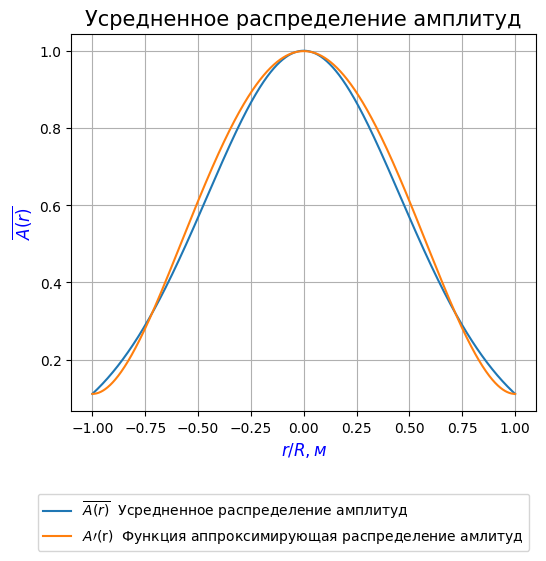

In [ ]:
plt.figure(figsize=(6,5),dpi = 100)
plt.plot(r/R, data_A, label='$\overline{A(r)}$  Усредненное распределение амплитуд')
plt.plot(r/R, A_prime(r,round(p[0][0],0)), label='$A\prime$(r)  Функция аппроксимирующая распределение амлитуд')
plt.title("Усредненное распределение амплитуд", fontsize=15)
plt.xlabel('$r/R,м$', fontsize=12, color='blue')
plt.legend(bbox_to_anchor=(1, -0.2))
plt.ylabel('$\overline{A(r)}$', fontsize=12, color='blue')
plt.grid(True)

Построим разностную и суммарную ДН антенны.

In [ ]:
#a_0 = 0.185
#lambda_0 = 25*const.milli
#p[0][0] = 3 


lmbda = lambda nu,u: round(abs(sp.lmbda(nu,u)[0][nu]*1e3),0)#лямбда функция
u = lambda theta: 2*const.pi*R/lambda_0*sin(theta)
#lmbda(4,3.8)
E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda(int(round(p[0][0],0)),u(theta))
#(3,u(theta))
#round(abs(sp.lmbda(4,3.8)[0][4]*1e3),0)

#theta = np.linspace(-5,2.5,1000)
theta = np.linspace(math.radians(-40) ,math.radians(40),1000)
data_E_sum_theta = 20*np.log10(np.array(list(map(E_sum_theta,theta))))
#10*np.log10
theta = list(map(math.degrees,theta))#конвертация радиан в градусы

Для расчета ДН суммарного канала, воспользуемся следующими формулами:

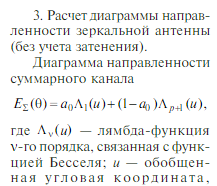

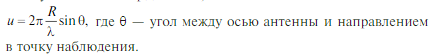

$$

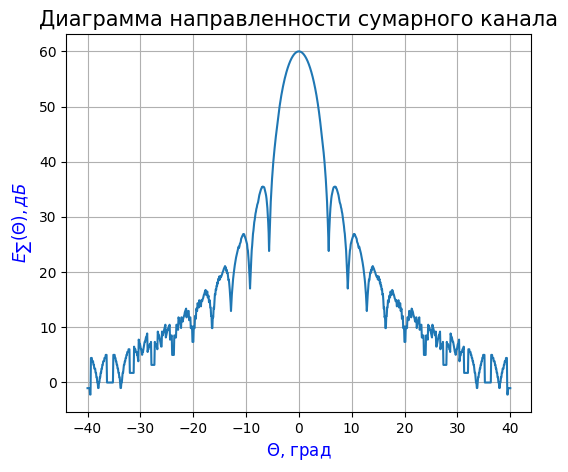

In [ ]:
plt.figure(figsize=(6,5),dpi = 100)
plt.plot(theta, data_E_sum_theta, label='$\overline{A(r)}$')
plt.title("Диаграмма направленности сумарного канала", fontsize=15)
plt.xlabel('$Θ$, град', fontsize=12, color='blue')
#plt.legend()
plt.ylabel('$E_{\sum}(Θ), дБ$', fontsize=12, color='blue')
plt.grid(True)

Теперь проведем расчет разностной ДН. Для этого учтем, что:

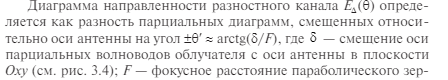

Таким образом, выражение для разностной ДН выглядит следующим образом:

EΔ(θ) = $E_\sum$(θ + atan($\frac{\delta}{F})$) - $E_\sum$(θ - atan($\frac{\delta}{F})$)

In [ ]:
delta = 9*const.milli
theta = np.linspace(math.radians(-40) ,math.radians(40),10000)
Delta_theta = math.atan(delta/F)
E_Delta = lambda theta:   E_sum_theta(theta + Delta_theta)  - E_sum_theta(theta - Delta_theta)
# -E_sum_theta(theta + math.atan(delta/F))
# + E_sum_theta(theta - math.atan(delta/F))
data_E_Delta_theta = (list(map(E_Delta,theta)))
data_E_sum_theta_plus = [E_sum_theta(i + Delta_theta) for i in theta]
data_E_sum_theta_minus = [E_sum_theta(i - Delta_theta) for i in theta]
#data_E_Delta_theta_lg = np.abs(data_E_Delta_theta)
theta = (list(map(math.degrees,theta)))#конвертация радиан в градусы
#data_E_Delta_theta

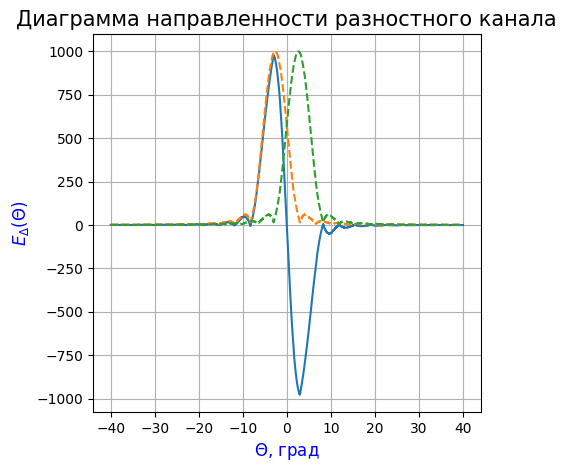

In [ ]:
plt.figure(figsize=(5,5),dpi = 100)
plt.plot(theta, (data_E_Delta_theta),
         label='$\overline{A(r)}$')
plt.plot(theta, (data_E_sum_theta_plus),
         label='$\overline{A(r)}$',
         linestyle = "--")
plt.plot(theta, (data_E_sum_theta_minus),
         label='$\overline{A(r)}$',
         linestyle = "--")
plt.title("Диаграмма направленности разностного канала", fontsize=15)
plt.xlabel('$Θ$, град', fontsize=12, color='blue')
#plt.legend()
plt.ylabel('$E_{\Delta}(Θ)$', fontsize=12, color='blue')
plt.grid(True)

In [ ]:
data_E_Delta_theta_db = np.log10(np.abs(data_E_Delta_theta))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(0.0, 3.0)

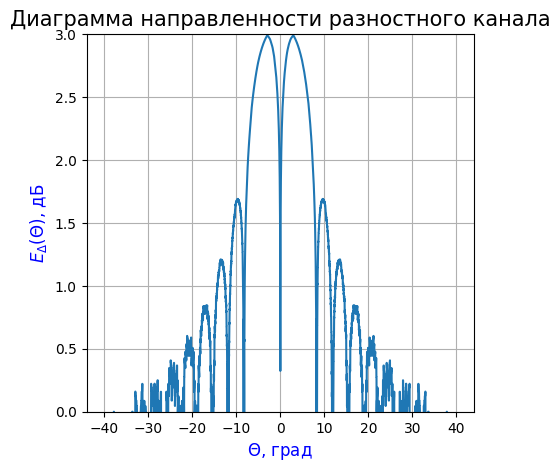

In [ ]:
plt.figure(figsize=(5,5),dpi = 100)
plt.plot(theta, (data_E_Delta_theta_db)
         )
plt.title("Диаграмма направленности разностного канала", fontsize=15)
plt.xlabel('$Θ$, град', fontsize=12, color='blue')
#plt.legend()
plt.ylabel('$E_{\Delta}(Θ)$, дБ', fontsize=12, color='blue')
plt.grid(True)
plt.ylim([0, 3])

# Расчет КНД

Расчитаем КНД по приведенной ниже формуле;

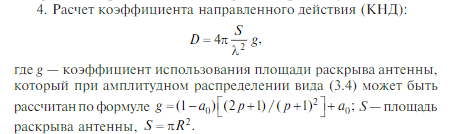

In [ ]:
S = const.pi*R**2
g = (1 - a_0)*(2*p[0] + 1)/(p[0] + 1)**2 + a_0
D = 4*const.pi*S/lambda_0**2*g

In [71]:
D[0],20*math.log10(D[0])

(1600.2148030970905, 64.0835656723471)

Таким образом, КНД для данной антенны состовляет D = 1600, или D = 64 дБ

Найдем относительное уменьшение КНД при повороте зеркальной антенны.

In [65]:
theta_c = 10 #град
theta_m = theta_c/2
theta_m

5.0

Согласно экспериментальным данным угол поворота главного максимума суммарной диограммы от оси системы $θ_C$ = 10. Согласно формуле: 

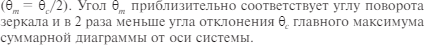

Тогда угол $θ_m$ = 5. Согласно представленному ниже графику $β_3$ = 0,26

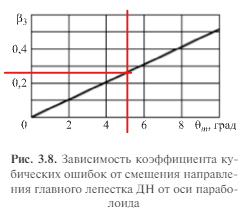

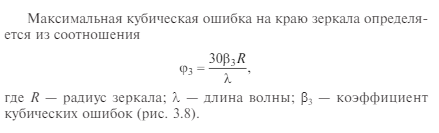

In [67]:
beta_3 = 0.26
phi_3 = 30*beta_3*R/lambda_0
phi_3

64.97995356507602

Теперь вычислим максимальную кубическую ошибку на краю зеркала. Согласно приведенной выше формуле $\varphi$ = 64,9

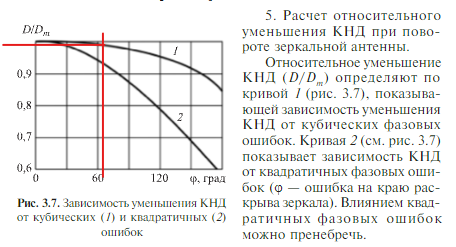

In [70]:
D_m = D[0]*0.99
D_m

1584.2126550661196

Таким образом, при повороте зеркала антенны на 10 градусов КНД состовляет D = 1584

# Экспериментальные данные

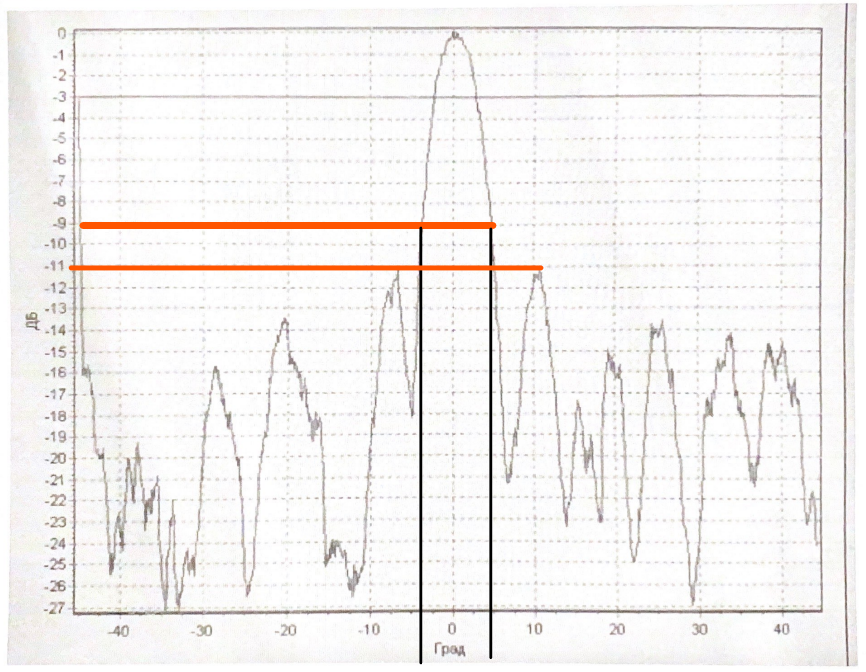

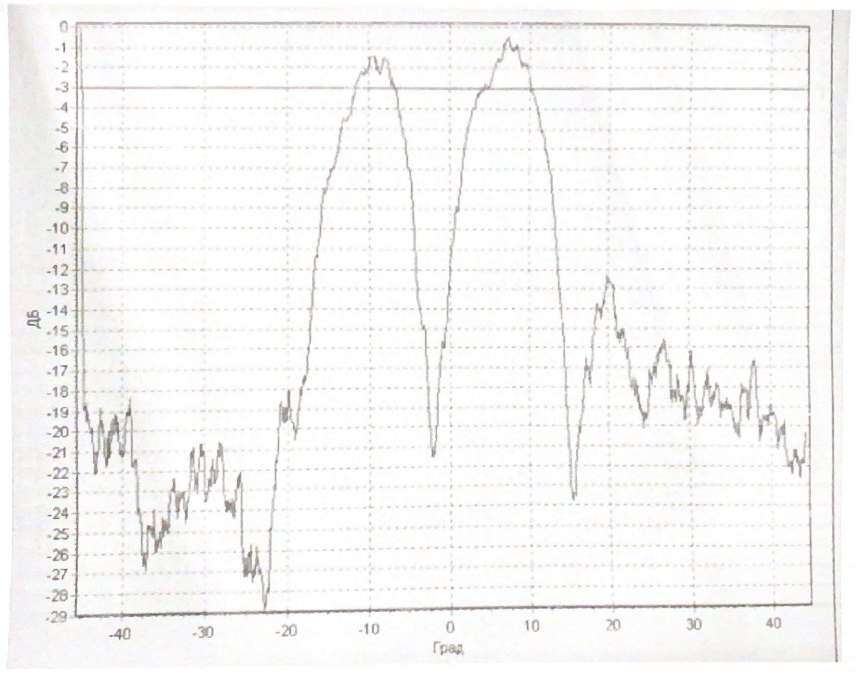

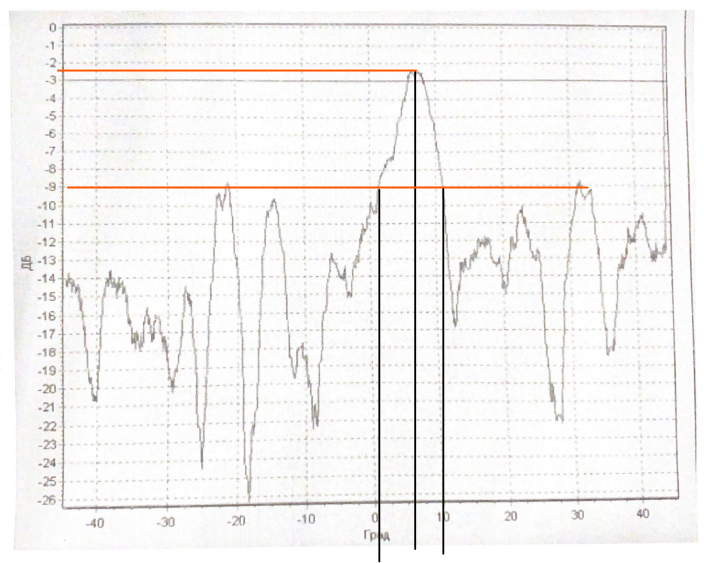